In [25]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [26]:
IMG_DIR = "/kaggle/input/masked-ds-utc/dataset/images"
MASK_DIR = "/kaggle/input/masked-ds-utc/dataset/mask"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 4
IMG_SIZE = 256

In [27]:
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="aiXeRTowid6zhbzBhNJw")
project = rf.workspace("petroglyphs").project("petroglyph-annotation")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [28]:
!pip install ultralytics -q

In [29]:
from ultralytics import YOLO

model = YOLO('/kaggle/input/yolo-hackathon/pytorch/default/1/best.pt')

In [30]:
TRAIN_YOLO = True # Нужно провести 8 эпох для результата

if TRAIN_YOLO:
    model.train(data='/kaggle/working/petroglyph-annotation-2/data.yaml',
                epochs=5,
                imgsz=820,
                project='petroglyph-yolo',
                name='exp1',
               augment=True)

Ultralytics 8.3.161 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/petroglyph-annotation-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=820, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/yolo-hackathon/pytorch/default/1/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_m

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

100%|██████████| 5.35M/5.35M [00:00<00:00, 194MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[820] must be multiple of max stride 32, updating to [832]
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1983.9±722.6 MB/s, size: 115.3 KB)


train: Scanning /kaggle/working/petroglyph-annotation-2/train/labels... 810 images, 0 backgrounds, 0 corrupt: 100%|██████████| 810/810 [00:00<00:00, 1379.96it/s]

train: New cache created: /kaggle/working/petroglyph-annotation-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 415.8±43.8 MB/s, size: 88.4 KB)


val: Scanning /kaggle/working/petroglyph-annotation-2/valid/labels... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 1640.15it/s]

val: New cache created: /kaggle/working/petroglyph-annotation-2/valid/labels.cache


Plotting labels to petroglyph-yolo/exp1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 832 train, 832 val
Using 4 dataloader workers
Logging results to petroglyph-yolo/exp1
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      5.69G      1.208      1.129      1.369        109        832: 100%|██████████| 51/51 [00:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        102        349       0.69      0.553       0.63      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      6.13G      1.251      1.201      1.399         66        832: 100%|██████████| 51/51 [00:22<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        102        349       0.61      0.521      0.562      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      6.17G      1.237      1.216      1.395         73        832: 100%|██████████| 51/51 [00:22<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        102        349      0.562      0.556      0.566      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      6.21G      1.203      1.132      1.361         73        832: 100%|██████████| 51/51 [00:22<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        102        349      0.691      0.516      0.592      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      6.24G      1.174      1.072      1.353         52        832: 100%|██████████| 51/51 [00:22<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        102        349      0.644      0.625      0.633       0.39



5 epochs completed in 0.034 hours.
Optimizer stripped from petroglyph-yolo/exp1/weights/last.pt, 22.5MB
Optimizer stripped from petroglyph-yolo/exp1/weights/best.pt, 22.5MB

Validating petroglyph-yolo/exp1/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]
invalid value encountered in less
invalid value encountered in less


                   all        102        349      0.706       0.57      0.663       0.44
Speed: 0.2ms preprocess, 21.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to petroglyph-yolo/exp1



image 1/1 /kaggle/working/petroglyph-annotation-2/test/images/3960942063_jpg.rf.33061947c943c5830f3fa1d623e64443.jpg: 576x832 5 petroglyphs, 100.4ms
Speed: 6.3ms preprocess, 100.4ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 832)


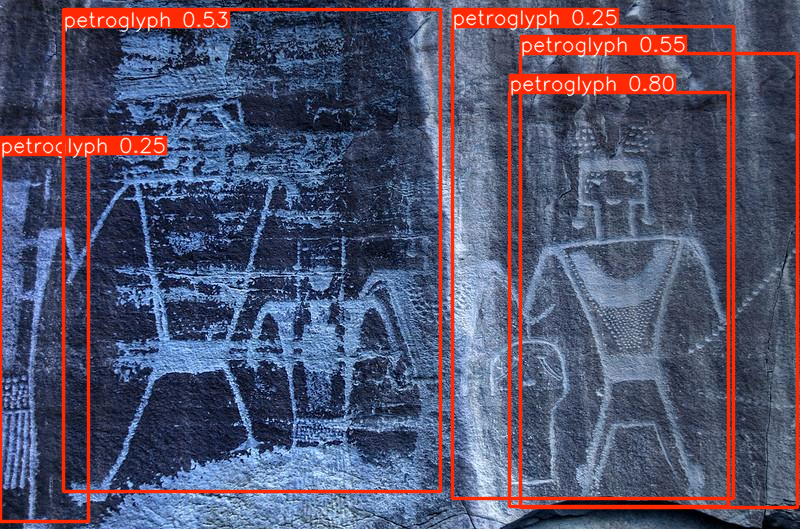

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import os

test_img_dir = '/kaggle/working/petroglyph-annotation-2/test/images'
test_images = [os.path.join(test_img_dir, img) for img in os.listdir(test_img_dir) if img.endswith('.jpg')]

for img_path in test_images[0:1]:
    results = model(img_path)
    result = results[0]
    
    plot_img = result.plot()
    
    im_pil = Image.fromarray(plot_img)
    display(im_pil)

In [32]:
def crop_from_bbox(img_tensor, bbox, padding=10):
    _, H, W = img_tensor.shape
    x1, y1, x2, y2 = map(int, bbox)

    x1 = max(0, x1 - padding)
    y1 = max(0, y1 - padding)
    x2 = min(W, x2 + padding)
    y2 = min(H, y2 + padding)

    return img_tensor[:, y1:y2, x1:x2], (x1, y1, x2, y2)

In [33]:
custom_img_path = "/kaggle/input/hackathon-utc/Dataset-20250701T053946Z-1-001/Dataset/image_2024-10-26_17-37-16(1).png"

from PIL import Image

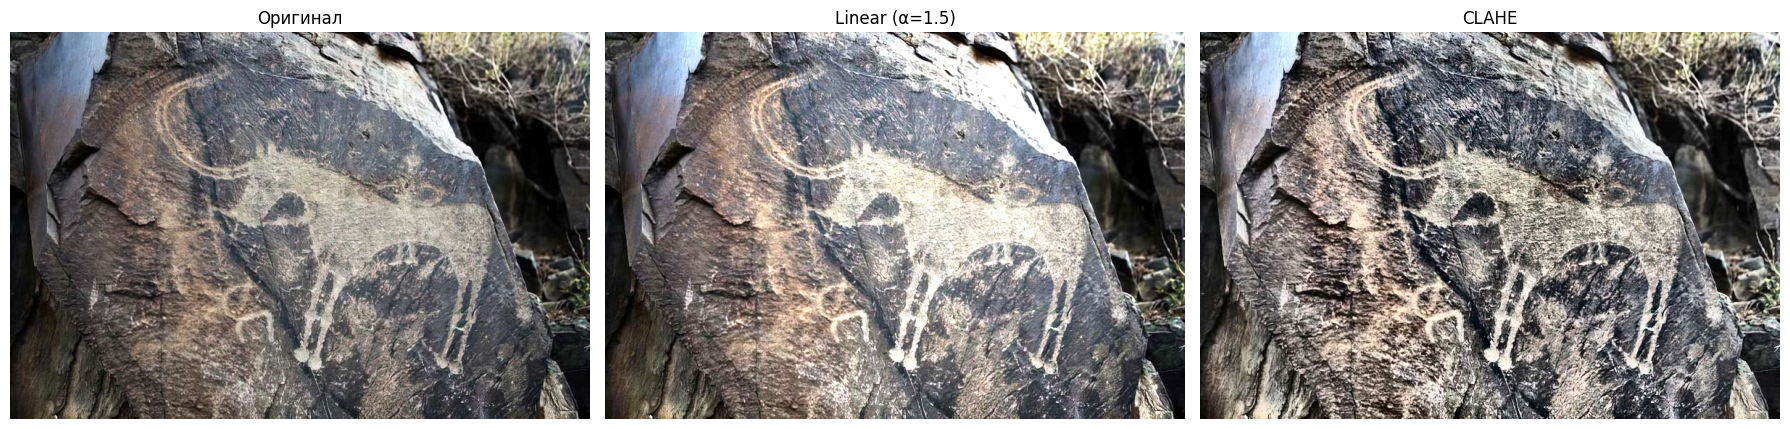

In [34]:
import cv2
import matplotlib.pyplot as plt

img_cv = cv2.imread(custom_img_path)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

alpha = 1.3
beta  = 0
img_linear = cv2.convertScaleAbs(img_cv, alpha=alpha, beta=beta)

lab   = cv2.cvtColor(img_cv, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)
lab_clahe = cv2.merge((l_clahe, a, b))
img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for ax, im, title in zip(axs, 
                        [img_cv, img_linear, img_clahe],
                        ['Оригинал', 'Linear (α=1.5)', 'CLAHE']):
    ax.imshow(im)
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()


0: 576x832 4 petroglyphs, 32.6ms
Speed: 4.2ms preprocess, 32.6ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 832)


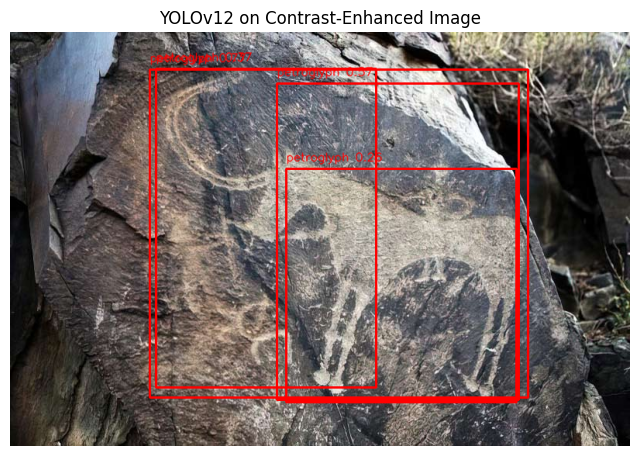

In [35]:
results_contrast = model(img_cv)[0]

boxes_contrast = results_contrast.boxes.xyxy.cpu().numpy()
conf_contrast  = results_contrast.boxes.conf.cpu().numpy()
cls_contrast   = results_contrast.boxes.cls.cpu().numpy()

import matplotlib.pyplot as plt
import cv2

vis = img_cv.copy()
for box, conf, cls_id in zip(boxes_contrast, conf_contrast, cls_contrast):
    x1, y1, x2, y2 = map(int, box)
    label = f"{results_contrast.names[int(cls_id)]} {conf:.2f}"
    cv2.rectangle(vis, (x1, y1), (x2, y2), (255,0,0), 2)
    cv2.putText(vis, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)

plt.figure(figsize=(8,8))
plt.imshow(vis)
plt.axis('off')
plt.title("YOLOv12 on Contrast-Enhanced Image")
plt.show()

In [36]:
results = model(img_cv)[0]
boxes = results.boxes.xyxy.cpu().numpy()


0: 576x832 4 petroglyphs, 24.0ms
Speed: 3.4ms preprocess, 24.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 832)


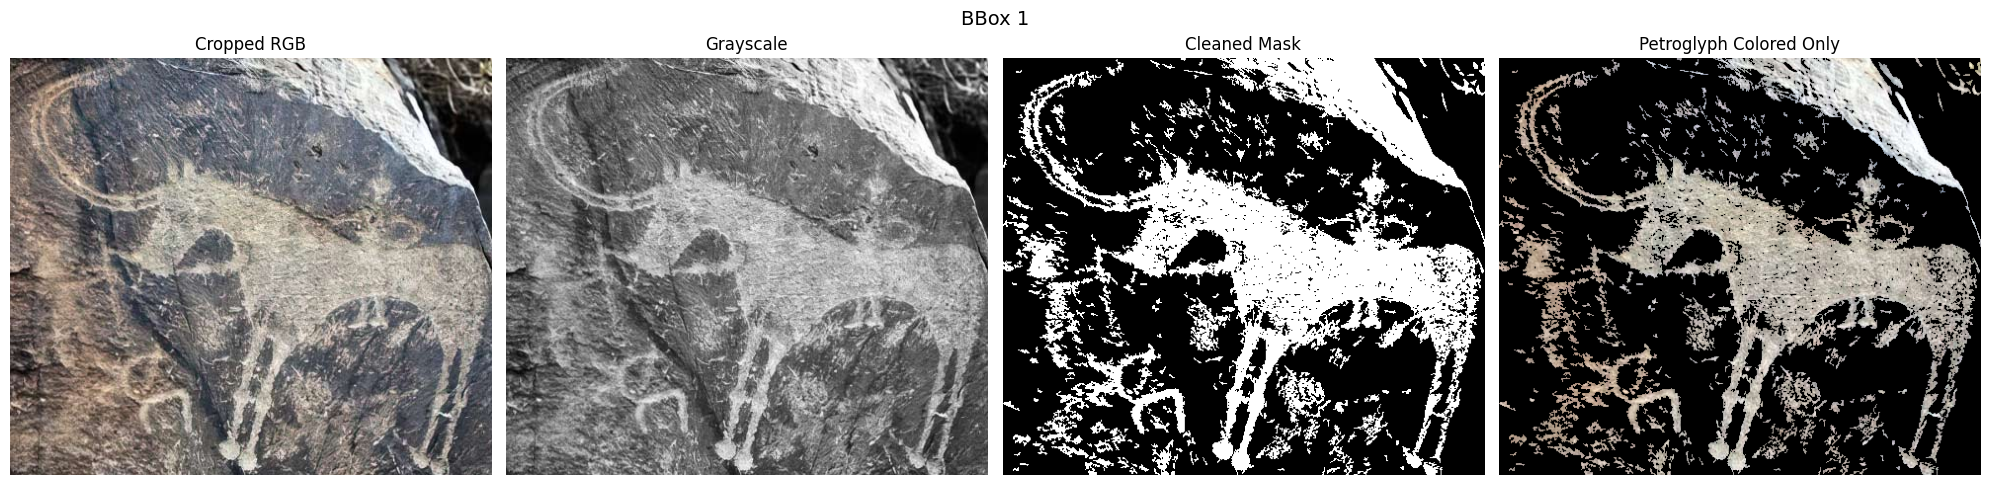

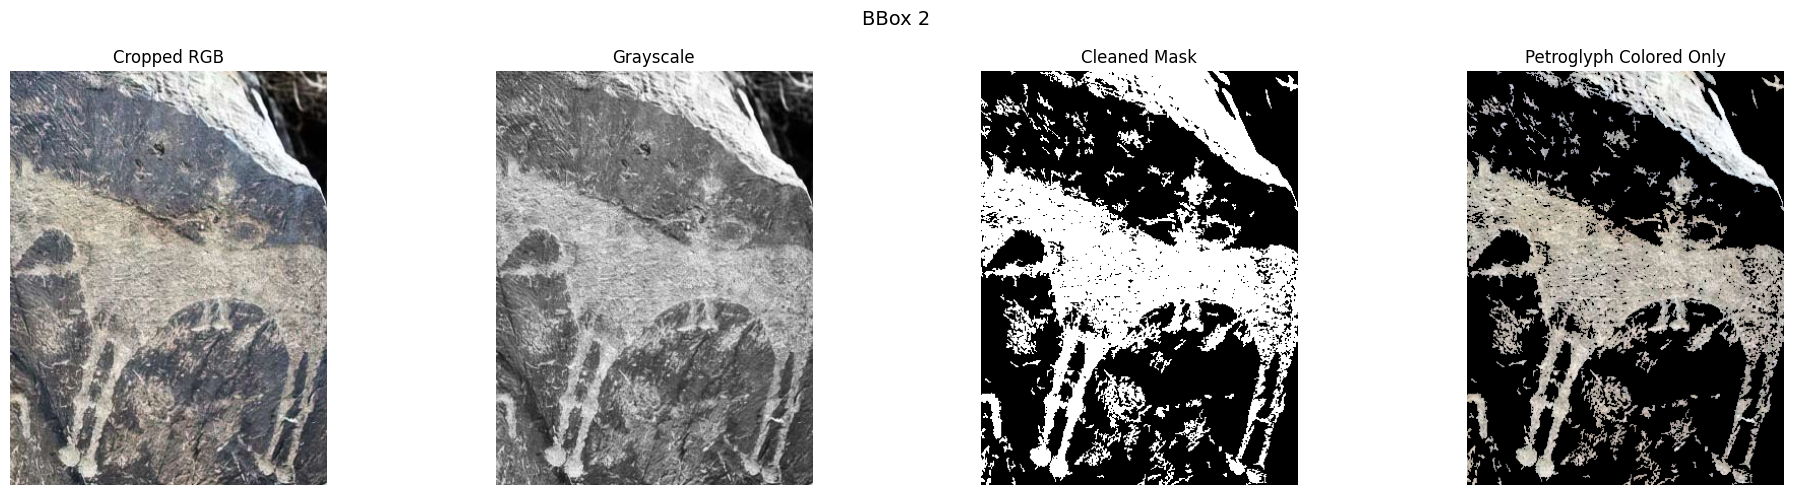

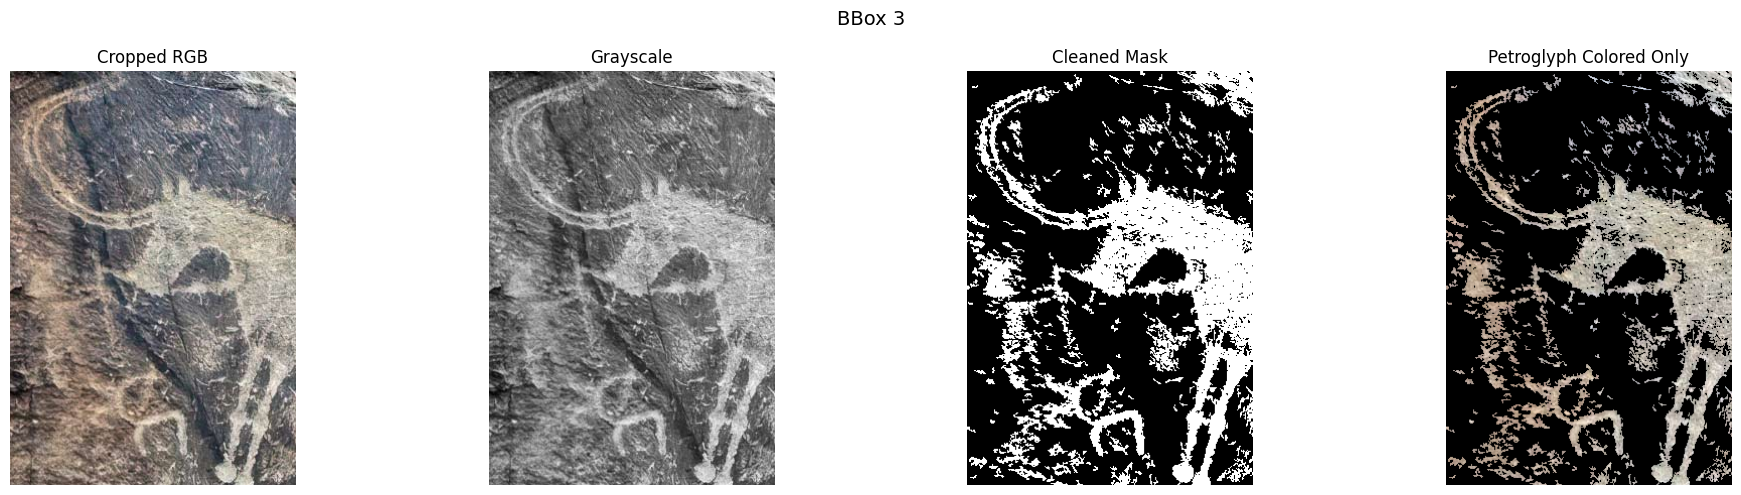

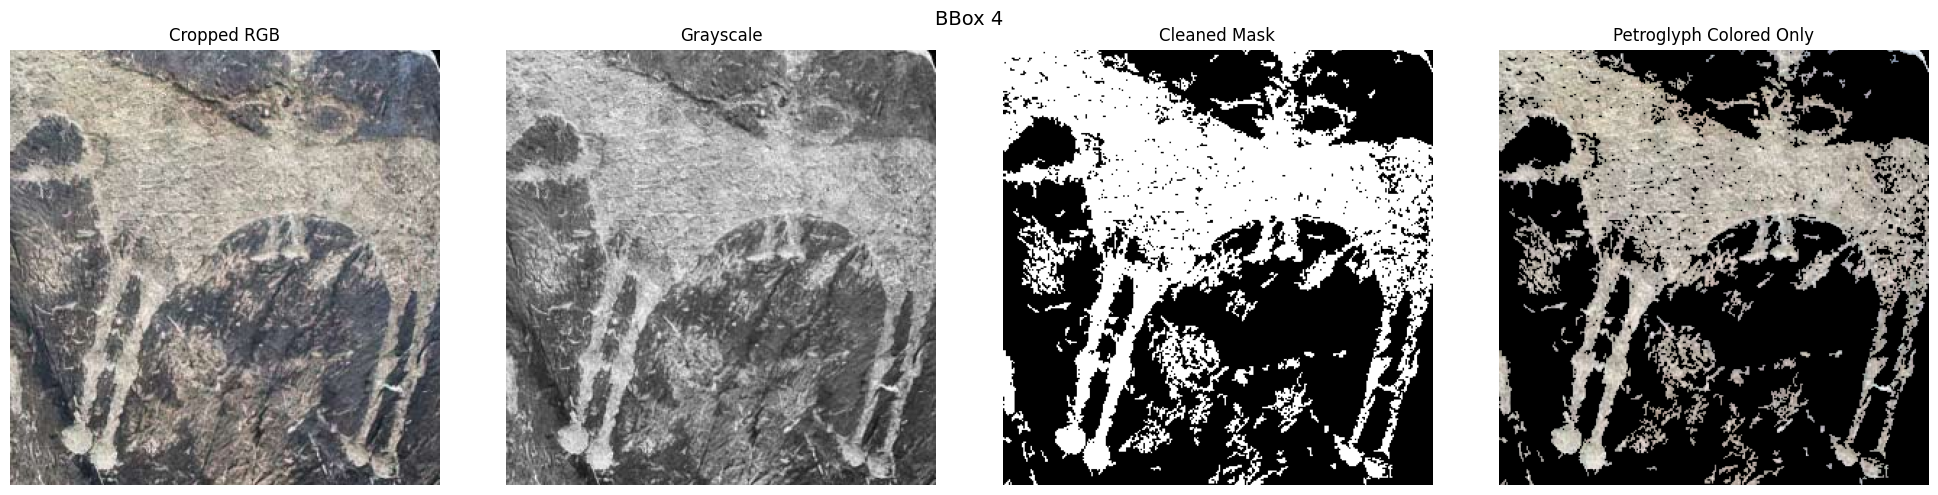

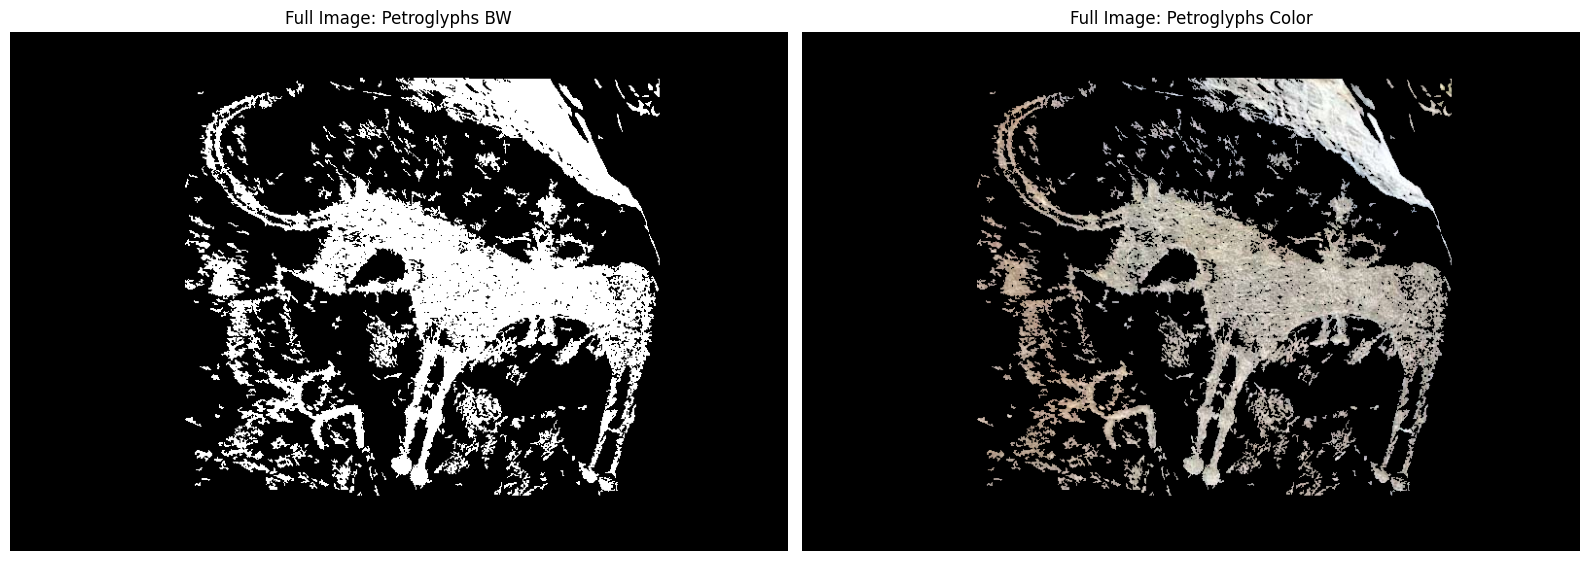

In [37]:
import cv2
import numpy as np
import torch
from PIL import Image, ImageEnhance
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

# 0️⃣ Пустые маски на всё изображение
segmented_result = np.zeros((img_cv.shape[0], img_cv.shape[1]), dtype=np.uint8)       # BW
segmented_color_result = np.zeros_like(img_cv)                                        # RGB

for i, bbox in enumerate(boxes):
    x1, y1, x2, y2 = map(int, bbox)

    # 1️⃣ Оригинальный цветной crop
    crop_img_cv_rgb = img_cv[y1:y2, x1:x2]

    # Boost color saturation (по желанию)
    pil_image = Image.fromarray(crop_img_cv_rgb)
    enhancer = ImageEnhance.Color(pil_image)
    boosted_image = enhancer.enhance(2.0)

    # ЧБ изображение
    crop_pil_gray = boosted_image.convert("L")
    crop_img_gray = np.array(crop_pil_gray)

    # 2️⃣ Порог
    threshold_value = 140
    _, thresholded_img = cv2.threshold(crop_img_gray, threshold_value, 255, cv2.THRESH_BINARY)

    # 2️⃣.5 Очистка по связным компонентам
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_img, connectivity=8)
    min_area = 10
    cleaned_mask = np.zeros_like(thresholded_img)
    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] >= min_area:
            cleaned_mask[labels == label] = 255

    # 🆕 Добавление в общую BW маску
    segmented_result[y1:y2, x1:x2] = np.maximum(segmented_result[y1:y2, x1:x2], cleaned_mask)

    # 🆕 Создание цветного петроглифа: только где mask == 255
    color_petroglyph_only = np.zeros_like(crop_img_cv_rgb)
    color_petroglyph_only[cleaned_mask == 255] = crop_img_cv_rgb[cleaned_mask == 255]

    # 🆕 Добавление цветного петроглифа в финальное цветное изображение
    mask_bool = cleaned_mask.astype(bool)
    segmented_color_result[y1:y2, x1:x2][mask_bool] = crop_img_cv_rgb[mask_bool]

    # Resize для модели
    crop_tensor = T.ToTensor()(crop_pil_gray)
    resized_crop = TF.resize(crop_tensor, [IMG_SIZE, IMG_SIZE])
    input_batch = resized_crop.unsqueeze(0).to(DEVICE)

    # 4️⃣ Визуализация
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"BBox {i+1}", fontsize=14)

    plt.subplot(1, 4, 1)
    plt.imshow(crop_img_cv_rgb)
    plt.title("Cropped RGB")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(crop_img_gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(cleaned_mask, cmap='gray')
    plt.title("Cleaned Mask")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(color_petroglyph_only)
    plt.title("Petroglyph Colored Only")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# 🔚 Финальные 2 изображения после всех bbox
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(segmented_result, cmap='gray')
plt.title("Full Image: Petroglyphs BW")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_color_result)
plt.title("Full Image: Petroglyphs Color")
plt.axis("off")

plt.tight_layout()
plt.show()

In [39]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from tqdm import tqdm
import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

# Константы
IMG_DIR = "/kaggle/input/hackathon-utc/Dataset-20250701T053946Z-1-001/Dataset"
OUTPUT_MASK_DIR = "/kaggle/working/predicted_masks"

IMG_SIZE = 256
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

os.makedirs(OUTPUT_MASK_DIR, exist_ok=True)

# Список файлов
image_files = [f for f in os.listdir(IMG_DIR) if f.endswith((".jpg", ".png"))]

for img_name in tqdm(image_files):
    img_path = os.path.join(IMG_DIR, img_name)

    # 1️⃣ Загрузка и CLAHE
    img_cv = cv2.imread(img_path)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    lab = cv2.cvtColor(img_cv, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

    # 2️⃣ Предсказание bbox через YOLOv12
    results = model(img_clahe)[0]
    boxes = results.boxes.xyxy.cpu().numpy()

    # 3️⃣ Пустая итоговая маска
    H, W = img_cv.shape[:2]
    segmented_result = np.zeros((H, W), dtype=np.uint8)

    for bbox in boxes:
        x1, y1, x2, y2 = map(int, bbox)
        crop_img_cv_rgb = img_cv[y1:y2, x1:x2]

        # ➕ Повышение насыщенности и преобразование в серый
        pil_image = Image.fromarray(crop_img_cv_rgb)
        enhancer = ImageEnhance.Color(pil_image)
        boosted_image = enhancer.enhance(2.0)
        crop_pil_gray = boosted_image.convert("L")
        crop_img_gray = np.array(crop_pil_gray)

        # ➕ Пороговая фильтрация
        _, thresholded_img = cv2.threshold(crop_img_gray, 140, 255, cv2.THRESH_BINARY)

        # ➕ Очистка от шума (по связным компонентам)
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(thresholded_img, connectivity=8)
        cleaned_mask = np.zeros_like(thresholded_img)
        for label in range(1, num_labels):
            if stats[label, cv2.CC_STAT_AREA] >= 10:
                cleaned_mask[labels == label] = 255

        # ➕ Вставка в общую маску
        segmented_result[y1:y2, x1:x2] = np.maximum(segmented_result[y1:y2, x1:x2], cleaned_mask)

    # 4️⃣ Сохраняем
    out_path = os.path.join(OUTPUT_MASK_DIR, os.path.splitext(img_name)[0] + ".png")
    Image.fromarray(segmented_result).save(out_path)

  0%|          | 0/62 [00:00<?, ?it/s]


0: 576x832 1 petroglyph, 23.8ms
Speed: 3.9ms preprocess, 23.8ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


  2%|▏         | 1/62 [00:00<00:11,  5.53it/s]


0: 576x832 (no detections), 23.8ms
Speed: 3.4ms preprocess, 23.8ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 832)

0: 640x832 4 petroglyphs, 119.7ms
Speed: 3.3ms preprocess, 119.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 832)


  5%|▍         | 3/62 [00:00<00:15,  3.86it/s]


0: 576x832 2 petroglyphs, 23.5ms
Speed: 3.2ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)

0: 576x832 1 petroglyph, 23.6ms
Speed: 3.6ms preprocess, 23.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


  8%|▊         | 5/62 [00:01<00:11,  5.14it/s]


0: 576x832 6 petroglyphs, 23.8ms
Speed: 2.9ms preprocess, 23.8ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)

0: 576x832 2 petroglyphs, 23.5ms
Speed: 3.1ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 11%|█▏        | 7/62 [00:01<00:08,  6.70it/s]


0: 480x832 1 petroglyph, 118.0ms
Speed: 3.1ms preprocess, 118.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)


 13%|█▎        | 8/62 [00:01<00:08,  6.35it/s]


0: 640x832 2 petroglyphs, 24.0ms
Speed: 3.4ms preprocess, 24.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 832)


 15%|█▍        | 9/62 [00:01<00:08,  6.06it/s]


0: 576x832 (no detections), 23.5ms
Speed: 3.6ms preprocess, 23.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 832)


 16%|█▌        | 10/62 [00:01<00:08,  6.29it/s]


0: 640x832 9 petroglyphs, 24.0ms
Speed: 4.0ms preprocess, 24.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 832)


 18%|█▊        | 11/62 [00:02<00:19,  2.59it/s]


0: 480x832 1 petroglyph, 22.1ms
Speed: 3.0ms preprocess, 22.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)

0: 480x832 (no detections), 21.8ms
Speed: 3.1ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 832)


 21%|██        | 13/62 [00:02<00:12,  3.98it/s]


0: 480x832 7 petroglyphs, 22.1ms
Speed: 3.0ms preprocess, 22.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)


 23%|██▎       | 14/62 [00:02<00:10,  4.64it/s]


0: 480x832 (no detections), 22.5ms
Speed: 2.9ms preprocess, 22.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 832)

0: 576x832 3 petroglyphs, 23.5ms
Speed: 3.6ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 26%|██▌       | 16/62 [00:03<00:10,  4.24it/s]


0: 608x832 (no detections), 88.0ms
Speed: 3.4ms preprocess, 88.0ms inference, 0.7ms postprocess per image at shape (1, 3, 608, 832)


 27%|██▋       | 17/62 [00:03<00:09,  4.55it/s]


0: 832x832 2 petroglyphs, 90.5ms
Speed: 4.7ms preprocess, 90.5ms inference, 1.5ms postprocess per image at shape (1, 3, 832, 832)


 29%|██▉       | 18/62 [00:03<00:10,  4.07it/s]


0: 480x832 12 petroglyphs, 22.3ms
Speed: 3.1ms preprocess, 22.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 832)


 31%|███       | 19/62 [00:04<00:09,  4.38it/s]


0: 640x832 1 petroglyph, 24.1ms
Speed: 3.9ms preprocess, 24.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 832)


 32%|███▏      | 20/62 [00:04<00:11,  3.78it/s]


0: 640x832 4 petroglyphs, 24.1ms
Speed: 3.9ms preprocess, 24.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 832)


 34%|███▍      | 21/62 [00:04<00:11,  3.68it/s]


0: 576x832 (no detections), 23.7ms
Speed: 3.6ms preprocess, 23.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 832)


 35%|███▌      | 22/62 [00:04<00:09,  4.41it/s]


0: 576x832 (no detections), 23.6ms
Speed: 2.9ms preprocess, 23.6ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 832)

0: 576x832 2 petroglyphs, 23.7ms
Speed: 3.2ms preprocess, 23.7ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 39%|███▊      | 24/62 [00:05<00:06,  6.02it/s]


0: 480x832 3 petroglyphs, 21.7ms
Speed: 2.9ms preprocess, 21.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 832)


 40%|████      | 25/62 [00:05<00:06,  6.15it/s]


0: 640x832 4 petroglyphs, 24.1ms
Speed: 3.9ms preprocess, 24.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 832)


 42%|████▏     | 26/62 [00:05<00:06,  5.27it/s]


0: 576x832 1 petroglyph, 23.9ms
Speed: 3.2ms preprocess, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)

0: 576x832 4 petroglyphs, 25.0ms
Speed: 3.7ms preprocess, 25.0ms inference, 1.5ms postprocess per image at shape (1, 3, 576, 832)


 45%|████▌     | 28/62 [00:06<00:08,  4.03it/s]


0: 480x832 (no detections), 22.7ms
Speed: 3.1ms preprocess, 22.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 832)

0: 576x832 4 petroglyphs, 23.4ms
Speed: 3.6ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 48%|████▊     | 30/62 [00:06<00:07,  4.05it/s]


0: 480x832 2 petroglyphs, 22.4ms
Speed: 3.0ms preprocess, 22.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 832)

0: 512x832 (no detections), 87.3ms
Speed: 3.4ms preprocess, 87.3ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 832)


 52%|█████▏    | 32/62 [00:06<00:06,  4.83it/s]


0: 480x832 2 petroglyphs, 22.2ms
Speed: 2.8ms preprocess, 22.2ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)


 53%|█████▎    | 33/62 [00:07<00:05,  5.35it/s]


0: 640x832 3 petroglyphs, 24.2ms
Speed: 3.8ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 832)


 55%|█████▍    | 34/62 [00:07<00:07,  3.84it/s]


0: 576x832 2 petroglyphs, 23.6ms
Speed: 3.3ms preprocess, 23.6ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 832)


 56%|█████▋    | 35/62 [00:07<00:06,  3.92it/s]


0: 480x832 (no detections), 22.6ms
Speed: 2.9ms preprocess, 22.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 832)

0: 608x832 9 petroglyphs, 24.2ms
Speed: 3.2ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 608, 832)


 60%|█████▉    | 37/62 [00:08<00:04,  5.00it/s]


0: 480x832 3 petroglyphs, 22.3ms
Speed: 3.1ms preprocess, 22.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)


 61%|██████▏   | 38/62 [00:08<00:04,  4.83it/s]


0: 640x832 2 petroglyphs, 27.1ms
Speed: 3.3ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 832)


 63%|██████▎   | 39/62 [00:08<00:04,  5.43it/s]


0: 576x832 3 petroglyphs, 23.5ms
Speed: 3.2ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 65%|██████▍   | 40/62 [00:08<00:03,  5.85it/s]


0: 832x480 (no detections), 112.0ms
Speed: 2.9ms preprocess, 112.0ms inference, 0.7ms postprocess per image at shape (1, 3, 832, 480)


 66%|██████▌   | 41/62 [00:08<00:03,  5.86it/s]


0: 608x832 2 petroglyphs, 24.9ms
Speed: 3.1ms preprocess, 24.9ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 832)

0: 480x832 (no detections), 21.8ms
Speed: 3.2ms preprocess, 21.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 832)


 69%|██████▉   | 43/62 [00:08<00:02,  7.54it/s]


0: 480x832 1 petroglyph, 21.8ms
Speed: 3.0ms preprocess, 21.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 832)


 71%|███████   | 44/62 [00:08<00:02,  7.58it/s]


0: 480x832 (no detections), 22.0ms
Speed: 2.8ms preprocess, 22.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 832)

0: 576x832 8 petroglyphs, 23.5ms
Speed: 3.8ms preprocess, 23.5ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 832)


 74%|███████▍  | 46/62 [00:09<00:02,  7.63it/s]


0: 576x832 6 petroglyphs, 23.4ms
Speed: 3.7ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 76%|███████▌  | 47/62 [00:09<00:02,  5.48it/s]


0: 576x832 2 petroglyphs, 23.4ms
Speed: 3.6ms preprocess, 23.4ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 832)


 77%|███████▋  | 48/62 [00:09<00:02,  5.91it/s]


0: 576x832 5 petroglyphs, 23.4ms
Speed: 2.9ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)

0: 416x832 (no detections), 113.7ms
Speed: 2.9ms preprocess, 113.7ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 832)


 81%|████████  | 50/62 [00:10<00:01,  6.26it/s]


0: 576x832 5 petroglyphs, 23.5ms
Speed: 3.5ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 82%|████████▏ | 51/62 [00:10<00:01,  6.20it/s]


0: 640x832 7 petroglyphs, 23.9ms
Speed: 3.6ms preprocess, 23.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 832)


 84%|████████▍ | 52/62 [00:10<00:01,  5.14it/s]


0: 576x832 5 petroglyphs, 23.6ms
Speed: 3.1ms preprocess, 23.6ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 85%|████████▌ | 53/62 [00:10<00:01,  5.69it/s]


0: 576x832 2 petroglyphs, 23.4ms
Speed: 3.0ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 87%|████████▋ | 54/62 [00:10<00:01,  6.29it/s]


0: 576x832 2 petroglyphs, 23.5ms
Speed: 3.7ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 89%|████████▊ | 55/62 [00:11<00:01,  5.04it/s]


0: 608x832 1 petroglyph, 24.4ms
Speed: 3.1ms preprocess, 24.4ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 832)


 90%|█████████ | 56/62 [00:11<00:01,  5.86it/s]


0: 576x832 2 petroglyphs, 23.5ms
Speed: 3.2ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 92%|█████████▏| 57/62 [00:11<00:00,  5.97it/s]


0: 512x832 1 petroglyph, 22.5ms
Speed: 3.2ms preprocess, 22.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 832)


 94%|█████████▎| 58/62 [00:11<00:00,  6.43it/s]


0: 640x832 2 petroglyphs, 24.2ms
Speed: 3.7ms preprocess, 24.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 832)


 95%|█████████▌| 59/62 [00:11<00:00,  5.64it/s]


0: 576x832 2 petroglyphs, 23.5ms
Speed: 3.5ms preprocess, 23.5ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


 97%|█████████▋| 60/62 [00:12<00:00,  4.01it/s]


0: 576x832 2 petroglyphs, 23.4ms
Speed: 3.2ms preprocess, 23.4ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)

0: 576x832 4 petroglyphs, 23.7ms
Speed: 3.4ms preprocess, 23.7ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 832)


100%|██████████| 62/62 [00:12<00:00,  4.98it/s]


In [41]:
import os
import zipfile

# Убедимся, что выходная папка существует
output_mask_dir = "/kaggle/working/predicted_masks"
os.makedirs(output_mask_dir, exist_ok=True)

# Путь к ZIP-архиву
zip_path = "/kaggle/working/predicted_masks.zip"

# Создание ZIP-архива
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_mask_dir):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, output_mask_dir)
                zipf.write(file_path, arcname)

print("ZIP архив сохранён:", zip_path)

ZIP архив сохранён: /kaggle/working/predicted_masks.zip
